In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="ticks")
faltui = ['#9b59b6', "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
faltui = sns.color_palette(faltui)

In [18]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [22]:
df = pd.read_csv('players_19.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Eng

In [6]:
df.shape

(17770, 104)

In [7]:
def convert(data, to):
    converted=None
    if to == 'array':
        if isinstance(data, np.array):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
        elif isinstance(data, list):
            converted = np.array(data)
            
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = np.tolist(data)
            
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    
    if converted is None:
            raise TypeError("cannot handle the data conversion type: {} to {}".format(type(data), to))
    else:
        return converted
    

In [68]:
from collections import Counter
import math
import scipy.stats as ss

In [9]:
def conditional_entropy(x, y):
    """
        Caluculates the conditional entropy of x given y: S(x|y)
        :param x: list / Numpy ndarray / pandas series
        :param Y: list / Numpy ndarray / pandas series
    """
    
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurence = sum(y_counter.values())
    entropy=0.0
    
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy]/total_occurence
        p_y = y_counter[xy[1]]/total_occurence
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

In [81]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2/(n-1))
    kcorr = k-((k-1)**2/(n-1))
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [11]:
def theilus_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurences = sum(x_counter.values())
    
    p_x = list(map(lambda n: n/total_occurences, x_counter.values()))
    x_x = stats.entropy(p_x)
    
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [12]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [71]:
def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,
                          return_results = False, **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and
    continuous features using:
     - Pearson's R for continuous-continuous cases
     - Correlation Ratio for categorical-continuous cases
     - Cramer's V or Theil's U for categorical-categorical cases
    :param dataset: NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    :param nominal_columns: string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can also be the string 'all' to state that all
        columns are categorical, or None (default) to state none are categorical
    :param mark_columns: Boolean (default: False)
        if True, output's columns' names will have a suffix of '(nom)' or '(con)' based on there type (eda_tools or
        continuous), as provided by nominal_columns
    :param theil_u: Boolean (default: False)
        In the case of categorical-categorical feaures, use Theil's U instead of Cramer's V
    :param plot: Boolean (default: True)
        If True, plot a heat-map of the correlation matrix
    :param return_results: Boolean (default: False)
        If True, the function will return a Pandas DataFrame of the computed associations
    :param kwargs:
        Arguments to be passed to used function and methods
    :return: Pandas DataFrame
        A DataFrame of the correlation/strength-of-association between all features
    """

    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(20,20))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'), cmap='coolwarm')
        plt.show()
    if return_results:
        return corr

In [40]:
df.dtypes

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

In [44]:
# cat and numerical values
num_col = []
catcols = []

In [45]:
for i in df:
    if df[i].dtype == "int64" or df[i].dtype == "float64":
        num_col.append(i)
    else:
        catcols.append(i)

In [47]:
num_col

['sofifa_id',
 'age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'release_clause_eur',
 'team_jersey_number',
 'contract_valid_until',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning']

In [55]:
catcols = catcols[:51]

In [56]:
p_df = df[num_col+catcols]
p_df.head()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,20801,33,187,83,94,94,77000000,405000,5,4,5,127100000.0,7.0,2022.0,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,NaN,2018-07-10,LS,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
1,158023,31,170,72,94,94,110500000,565000,5,4,4,226500000.0,10.0,2021.0,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,"CF, RW, ST",Left,Medium/Medium,Messi,Yes,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,NaN,2004-07-01,CF,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
2,190871,26,175,68,92,93,118500000,290000,5,5,5,228100000.0,10.0,2022.0,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Neymar,Yes,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,NaN,2017-08-03,LW,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,193080,27,193,76,91,93,72000000,260000,4,3,1,138600000.0,1.0,2019.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,1990-11-07,Spain,Manchester United,GK,Right,Medium/Medium,Lean,Yes,NaN,GK,NaN,2011-07-01,GK,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,192985,27,181,70,91,92,102000000,355000,4,5,4,196400000.0,17.0,2023.0,7.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,1991-06-28,Belgium,Manchester City,"CAM, CM",Right,High/High,Normal,Yes,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,NaN,2015-08-30,RCM,"Leadership, Early Crosser, Long Passer (CPU AI...",93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13


In [57]:
corr = p_df.corr()

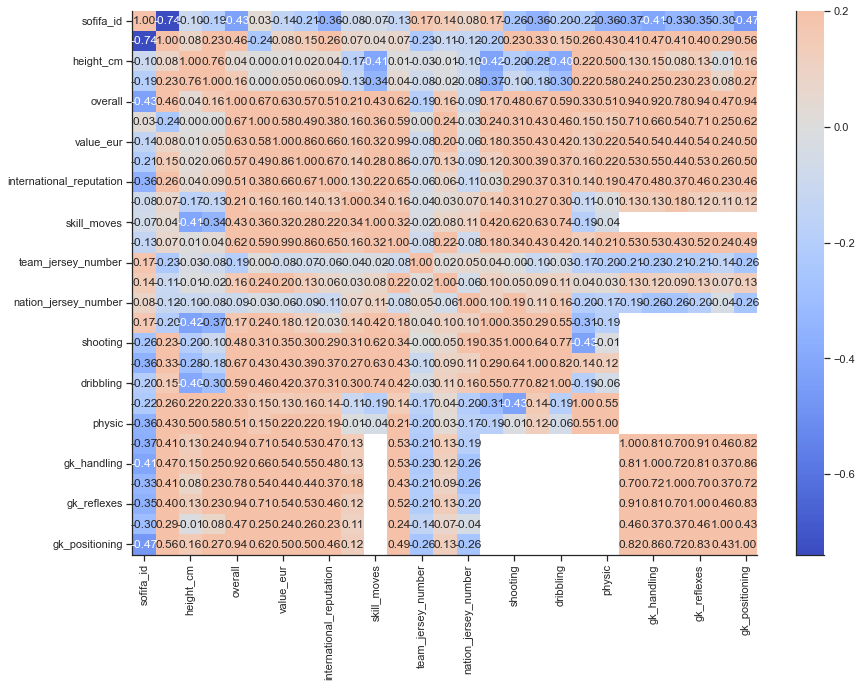

In [60]:
g = sns.heatmap(corr, vmax=.2, center=0, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14, 10)
plt.show()

In [73]:
p_df = p_df.fillna(0)

C:\Users\PC\AppData\Local\Temp/ipykernel_14464/3724683553.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
C:\Users\PC\AppData\Local\Temp/ipykernel_14464/3724683553.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))


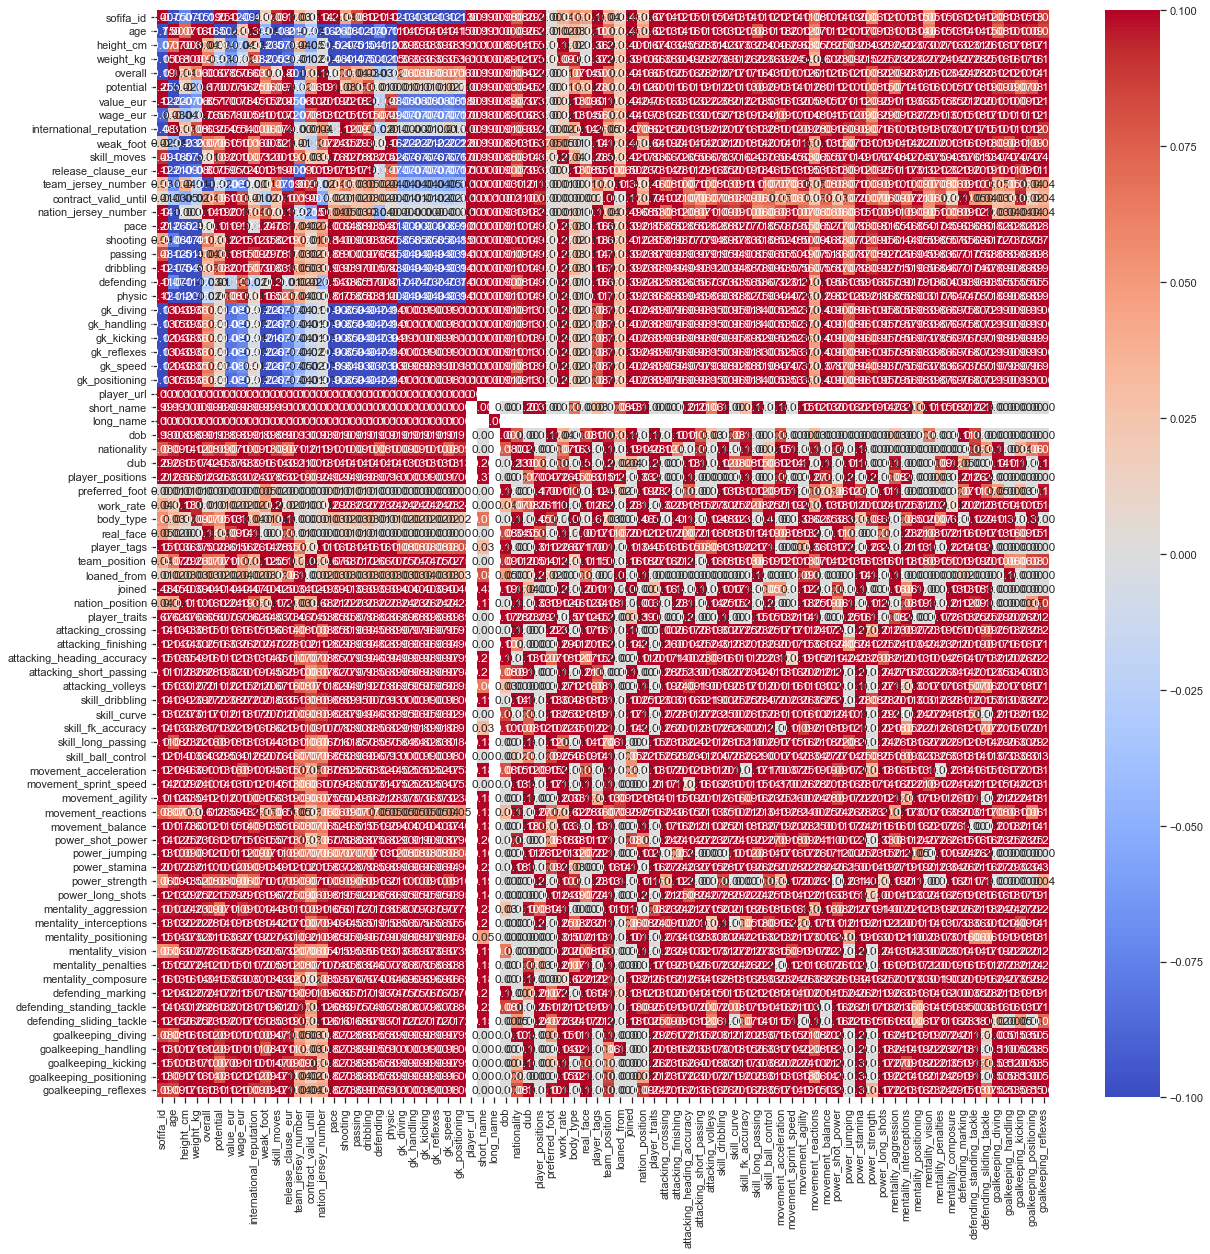

In [82]:
results = associations(p_df.head(1000), nominal_columns=catcols, return_results=True)

In [78]:
p_df['nationality'].unique()

array(['Portugal', 'Argentina', 'Brazil', 'Spain', 'Belgium', 'Uruguay',
       'Croatia', 'Slovenia', 'Germany', 'Poland', 'England', 'France',
       'Italy', 'Denmark', 'Colombia', 'Egypt', 'Wales', 'Senegal',
       'Slovakia', 'Chile', 'Gabon', 'Costa Rica', 'Morocco',
       'Bosnia Herzegovina', 'Serbia', 'Greece', 'Austria', 'Netherlands',
       'Sweden', 'Algeria', 'Korea Republic', 'Finland', 'Armenia',
       'Guinea', 'Montenegro', 'Japan', 'Jamaica', 'Ghana', 'Ivory Coast',
       'Czech Republic', 'Switzerland', 'Turkey', 'DR Congo', 'Norway',
       'Ecuador', 'Mexico', 'Ukraine', 'Russia', 'Scotland', 'Albania',
       'Venezuela', 'Cameroon', 'Iceland', 'United States',
       'Dominican Republic', 'Nigeria', 'Paraguay', 'Kenya', 'Romania',
       'Republic of Ireland', 'Israel', 'Mali', 'Burkina Faso',
       'Australia', 'Cape Verde', 'Togo', 'Peru', 'Hungary',
       'FYR Macedonia', 'Angola', 'Zimbabwe', 'Iran', 'New Zealand',
       'Canada', 'South Africa', 'Nor

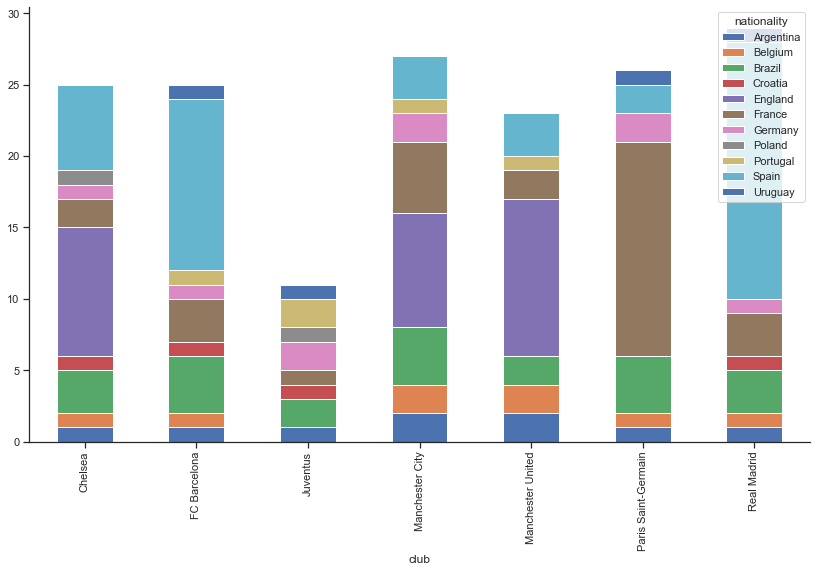

In [80]:
sns.set(style='ticks')
filter_player_df = p_df[(p_df['club'].isin(['Juventus', 'FC Barcelona', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Real Madrid', 'Chelsea',])) & (p_df['nationality'].isin(['Portugal', 'Argentina', 'Brazil', 'Spain', 'Belgium', 'Uruguay',
       'Croatia', 'Slovenia', 'Germany', 'Poland', 'England', 'France',]))]

df_plot = filter_player_df.groupby(['club', 'nationality']).size().reset_index().pivot(columns='club', index='nationality', values=0).reset_index()

g = df_plot.set_index('nationality').T.plot(kind='bar', stacked=True, color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14, 8)
plt.show()

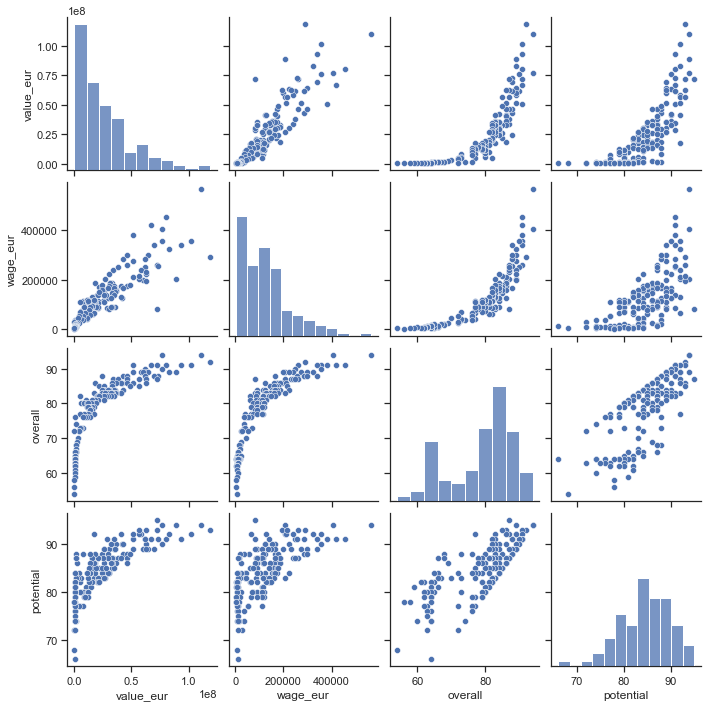

In [83]:
g = sns.pairplot(filter_player_df[['value_eur', 'wage_eur', 'overall', 'potential']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points 

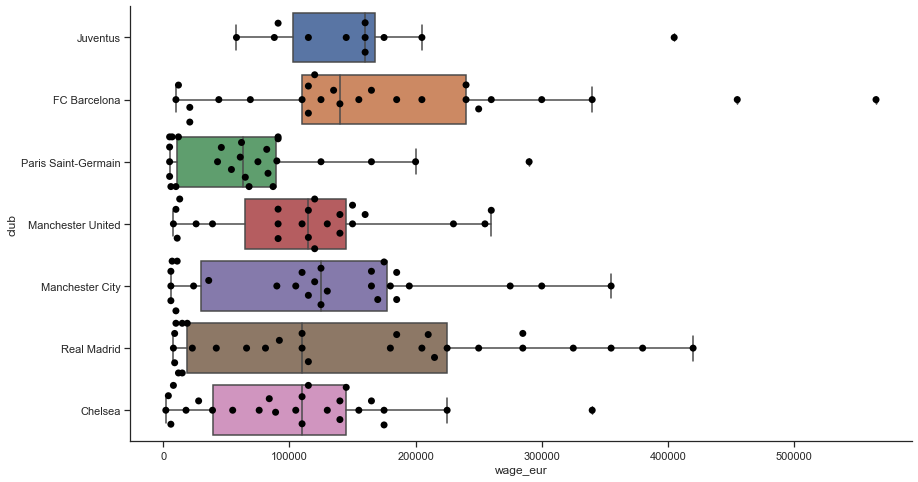

In [91]:
g = sns.boxplot(y='club', x='wage_eur', data=filter_player_df)
g = sns.swarmplot(y='club', x='wage_eur', data=filter_player_df, size=7, color='black')
sns.despine()
g.figure.set_size_inches(14, 8)
plt.show()